Name - Harshita Wardhan

URN - 6831456

Email - hw014587@surrey.ac.uk




This notebook contains the coursework for Data Science Principles and Practices. The main task is to classify and validate E.coli Protein Localisation Sites, specifically focusing on the C – Class for protein location. Here, a value of 0 represents proteins located in the inner membrane, while proteins in the perisplasm are labeled as 1.

## Import Libraries
 
In this coursework, we've harnessed the power of several key libraries to streamline our tasks:

- NumPy (as np): A go-to for numerical calculations, NumPy simplifies complex arithmetic and enhances efficiency in working with arrays and matrices. <br>
- Pandas (as pd): Crucial for data management, Pandas offers DataFrames for seamless dataset manipulation, making data analysis a breeze.
- Matplotlib (as plt): This versatile data visualization library enables us to create various charts, enhancing our ability to interpret and communicate data effectively. <br>
- Seaborn (as sns): A step beyond Matplotlib, Seaborn provides advanced visualization tools, and sns.set() adds an attractive touch to our charts. <br>
- Sci-kit Learn (as sklearn): This library is our go-to for basic machine learning tasks, simplifying the development and evaluation of machine learning models. <br>

These libraries collectively empower our workflow, ensuring efficiency in data handling, analysis, and visualization, as well as facilitating the implementation of machine learning models.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Dataset
 
In this section, we address the initial step of our analysis – importing the dataset related to E.coli Protein Localisation Sites. The dataset is stored as a .csv file, and the pandas library is utilized for data handling and exploration.
The df = pd.read_csv("ecoli.csv") command is employed to read the E.coli dataset from the specified .csv file, and the resulting dataframe is stored in the variable df. To ensure data integrity, a copy of the original data is created using data_copy = df. The loaded dataset is then displayed using df, providing an initial glimpse of the information we have for further analysis.
This marks the commencement of our exploration into E.coli Protein Localisation Sites, laying the foundation for subsequent stages such as data preprocessing, analysis, and model development.

In [18]:
# Load the data from the CSV file
df = pd.read_csv("ecoli.csv")
df

,X1,X2,X3,X4,X5,C
0,-0.007564,0.222171,0.158978,1.159728,0.267387,0
1,0.171858,-0.041690,0.250635,0.165851,0.461043,0
2,0.736046,0.343963,0.749114,0.561858,0.712554,0
3,0.000639,-0.175082,0.070584,0.317284,0.582597,0
4,0.571760,-0.244216,0.234515,0.902095,0.594026,0
...,...,...,...,...,...,...
124,0.648946,0.946382,0.893618,0.539939,0.532365,1
125,0.768015,0.955685,0.495043,0.100583,0.836665,1
126,0.649908,0.845137,0.406619,0.654427,1.003261,1
127,0.221111,0.787071,0.318218,0.867372,0.682562,1


## Data Analysis
To gain an initial understanding of the E.coli Protein Localisation Sites dataset, a general summary is provided below using the df.describe() function.

The the df.describe() function yields statistical summaries for each numerical column within the dataset. This comprehensive summary incorporates key metrics such as count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values. These statistics provide a comprehensive view of the central tendencies and distribution of the data, offering an initial insight into the overall characteristics of the dataset.

In [19]:
df.describe()

,X1,X2,X3,X4,X5,C
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,0.539102,0.597149,0.521040,0.686822,0.565779,0.403101
std,0.478155,0.433768,0.378367,0.438045,0.412171,0.492433
min,-0.430791,-0.281866,-0.263064,-0.600203,-0.484916,0.000000
25%,0.180917,0.284631,0.250635,0.416989,0.267387,0.000000
50%,0.559401,0.535186,0.495043,0.716888,0.568919,0.000000
75%,0.826496,0.864219,0.793372,0.962953,0.836665,1.000000
max,2.044694,1.711213,1.486272,1.743930,1.848438,1.000000


The df.info() function provides a concise summary of the dataset, including the data types of each column, the number of non-null values, and memory usage. This information is crucial for identifying potential data types, ensuring data consistency, and addressing any missing values that may impact subsequent analyses.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      129 non-null    float64
 1   X2      129 non-null    float64
 2   X3      129 non-null    float64
 3   X4      129 non-null    float64
 4   X5      129 non-null    float64
 5   C       129 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 6.2 KB


The 'C' column is our target variable in this dataset, and it's crucial to check how values are distributed between the two classes (0 and 1). The code used below counts how many times 0s and 1s appear in the 'C' column using the value_counts() method. This information is essential to understand the balance between the classes in our target variable. The subsequent print statements provide a clear breakdown of the counts for each class (0 and 1) in the 'C' column, giving us a straightforward view of the distribution.

In [45]:
# Count of 0s and 1s in the column 'C' 
count_0 = df['C'].value_counts().get(0, 0)
count_1 = df['C'].value_counts().get(1, 0)

print(f'Number of 0s in column C: {count_0}')
print(f'Number of 1s in column C: {count_1}')

Number of 0s in column C: 77
Number of 1s in column C: 52


The purpose of the following code is to understand the relationships between different columns in the dataset. This involves performing a Pearson correlation analysis using the df.corr(method='pearson') method.

This code segment employs the Pearson correlation coefficient, a metric for linear correlation, to assess the interconnections among numerical columns in the dataset. The resultant correlation matrix offers significant insights into associations between variables. This analytical process is pivotal for revealing potential patterns and dependencies within the dataset, aiding in the identification of key factors linked to E.coli Protein Localisation Sites.

In [22]:
df.corr(method='pearson')

,X1,X2,X3,X4,X5,C
X1,1.000000,0.088768,0.075019,-0.042973,-0.078337,0.237523
X2,0.088768,1.000000,0.032293,-0.094101,-0.145810,0.345237
X3,0.075019,0.032293,1.000000,-0.005492,-0.014480,-0.068347
X4,-0.042973,-0.094101,-0.005492,1.000000,-0.051284,-0.310577
X5,-0.078337,-0.145810,-0.014480,-0.051284,1.000000,-0.326354
C,0.237523,0.345237,-0.068347,-0.310577,-0.326354,1.000000


To further understand the distribution of features across the two classes in the E.coli Protein Localisation Sites dataset, the dataset is separated into two distinct classes, Class 0 and Class 1. The subsequent grouped bar chart provides a visual representation of the mean values for each feature within these classes.To further understand the distribution of features across the two classes in the E.coli Protein Localisation Sites dataset, the dataset is separated into two distinct classes, Class 0 and Class 1. The subsequent grouped bar chart provides a visual representation of the mean values for each feature within these classes.

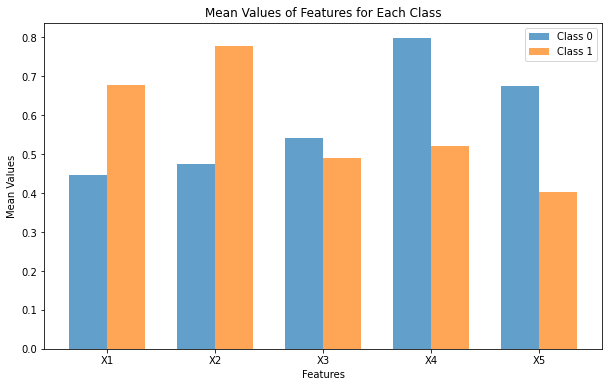

In [23]:
# Separate the dataset into two classes in order to plot
class_0 = df[df['C'] == 0]
class_1 = df[df['C'] == 1]

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(df.columns) - 1)

bar1 = ax.bar(index, class_0.mean()[:-1], bar_width, label='Class 0', alpha=0.7)
bar2 = ax.bar([i + bar_width for i in index], class_1.mean()[:-1], bar_width, label='Class 1', alpha=0.7)

ax.set_xlabel('Features')
ax.set_ylabel('Mean Values')
ax.set_title('Mean Values of Features for Each Class')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(df.columns[:-1])
ax.legend()

plt.show()

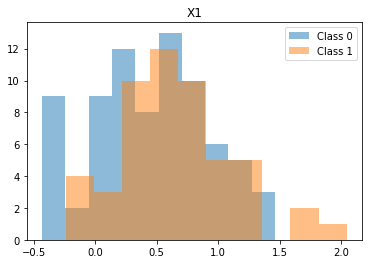

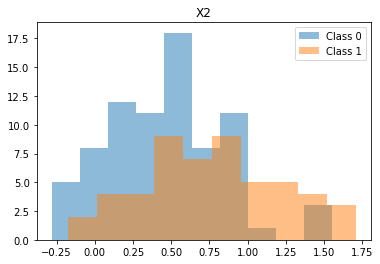

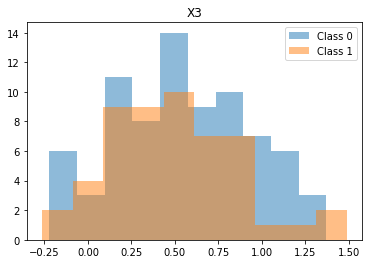

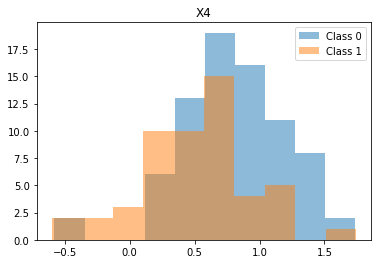

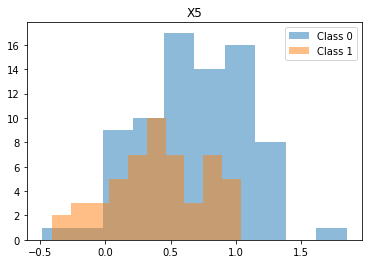

In [24]:
for feature in df.columns[:-1]:
    plt.hist(df[df['C'] == 0][feature], alpha=0.5, label='Class 0')
    plt.hist(df[df['C'] == 1][feature], alpha=0.5, label='Class 1')
    plt.title(feature)
    plt.legend()
    plt.show()

# Modeling 

*Splitting the dataset*

We're now poised to proceed with building our models, our attention now shifts to building predictive models. Specifically, we are planning to implement two classifier models: Naive Bayes and a Logistic Regression model as requested.

Before diving into the model specifics, we first need to divide our dataset into two distinct parts - a training set, which will be used to train the model, and a testing set, reserved for assessing model performance. Sklearn provides a handy function for this task. The data is divided in a 80-20 split, and to maintain consistency across different runs, the random state is set to 60, a choice influenced by personal preference and perhaps a touch of luck.

In [25]:
from sklearn.model_selection import train_test_split
# Split the data into features (X) and the target variable (y)
X = df[['X1', 'X2', 'X3', 'X4', 'X5']]
y = df['C']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

In [26]:
print(X_train.shape, X_test.shape)

(103, 5) (26, 5)


Given our limited dataset comprising 6 columns, there's no necessity for Feature Engineering. We can proceed directly to the modeling phase. Our approach will involve implementing two classifier models:

- Naive Bayes
- Logistic Regression model

# Naive Bayes Model

The Naive Bayes model is a machine learning algorithm specifically designed for classification tasks, where its primary goal is to make predictions by determining the presence (YES) or absence (NO) of certain features. In this context, the Gaussian Naive Bayes variant is employed to analyze a given dataset.

In the Gaussian Naive Bayes classification applied to the ecoli dataset, a fundamental assumption is made that the data follows a normal distribution. This implies that the likelihood of each class is determined by assuming that the features are distributed according to the Gaussian (normal) distribution and are independent of each other.

Now, let's delve into how this model calculates the class probabilities within the context of the ecoli dataset:

Firstly, the model calculates the probability that a data point belongs to Class 1 (represented by column C having a value of 1), given its features. This probability is denoted as P(1|x). Additionally, it computes the probability that the data point does not belong to Class 1, represented as P(0|x). The prediction is then made based on the comparison of these two probabilities. Specifically, if P(0|x) is greater than P(1|x), the model predicts Class 0; otherwise, it predicts Class 1. This decision-making process is fundamental to the classification task performed by the Gaussian Naive Bayes model on the ecoli dataset.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Gaussian Naive Bayes Model Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Gaussian Naive Bayes Model Accuracy: 0.7692307692307693

Confusion Matrix:
 [[13  2]
 [ 4  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.78      0.64      0.70        11

    accuracy                           0.77        26
   macro avg       0.77      0.75      0.76        26
weighted avg       0.77      0.77      0.76        26



# Logistic regression model


Logistic regression is a method used to figure out if a certain data point in the ecoli dataset falls into either Class 1 or Class 0. Unlike Gaussian Naive Bayes, which makes assumptions about how the data is spread out, logistic regression focuses on figuring out the probability of belonging to a particular class.

In this approach, logistic regression employs a function to estimate the chance that a data point belongs to Class 1, known as P(1|x). This probability is determined by looking at the features (X1 to X5) of the given data point. Additionally, the model calculates the chance of belonging to Class 0, denoted as P(0|x).

To simplify the decision-making process, logistic regression introduces a decision boundary. If the probability of belonging to Class 1 (P(1|x)) is higher than a set threshold, usually 0.5, the model predicts Class 1. If it's below this threshold, it predicts Class 0.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Logistic Regression Model Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Logistic Regression Model Accuracy: 0.7692307692307693

Confusion Matrix:
 [[13  2]
 [ 4  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.78      0.64      0.70        11

    accuracy                           0.77        26
   macro avg       0.77      0.75      0.76        26
weighted avg       0.77      0.77      0.76        26



# Validation

We applied both models to our ecoli dataset and observed an accuracy exceeding 76% for each. However, this assessment is based on training and testing the models with a specific set of data. If we had chosen a different dataset for training and testing, the accuracy results might have varied.

To address this variability and ensure a more robust evaluation, we employed cross-validation techniques, specifically using k-fold cross-validation. In this approach, the dataset is divided into k parts or folds. During each iteration, one part is designated for testing, while the remaining parts are used for training. This process is repeated k times, ensuring that every part serves as the test set at least once. To maintain consistency with our initial split (80-20), we opted for 4 folds.

By leveraging scikit-learn (sklearn) for implementation, we ensure a standardized and reliable application of cross-validation on our ecoli dataset.

In [29]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score


Naive Bayes Cross-Validation Test Accuracy: 0.7669230769230768
Naive Bayes Cross-Validation Train Accuracy: 0.796078921078921


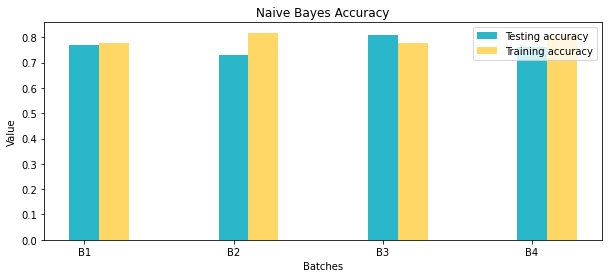

In [40]:
# Perform cross-validation for Naive Bayes
val_bayes = cross_validate(bayes_model, X_train, y_train, cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=57),
                           return_train_score=True, scoring=['accuracy', 'precision', 'recall', 'f1'])

# Get the test and train accuracy scores for Naive Bayes
test_score_bayes, train_score_bayes = val_bayes['test_accuracy'], val_bayes['train_accuracy']

# Print the cross-validation results for Naive Bayes
print("Naive Bayes Cross-Validation Test Accuracy:", np.mean(test_score_bayes))
print("Naive Bayes Cross-Validation Train Accuracy:", np.mean(train_score_bayes))

# Visualize the data for Naive Bayes
def visualise(train, test, title):
    x_axis = np.arange(4)
    plt.figure(figsize=(10, 4))
    plt.bar(x_axis, test, label='Testing accuracy', width=0.2, color='#2ab7ca')
    plt.bar(x_axis + 0.2, train, label='Training accuracy', width=0.2, color='#fed766')
    plt.xticks(x_axis, ['B1', 'B2', 'B3', 'B4']) 
    plt.xlabel('Batches')
    plt.ylabel('Value')
    plt.legend()
    plt.title(title)
    plt.show()

# Visualize the data for Naive Bayes
visualise(train_score_bayes, test_score_bayes, 'Naive Bayes Accuracy')

Logistic Regression Cross-Validation Test Accuracy: 0.7573076923076922
Logistic Regression Cross-Validation Train Accuracy: 0.7928737928737929


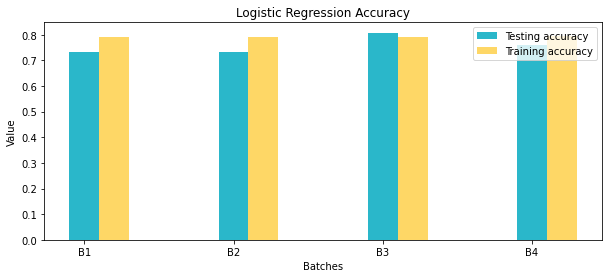

In [41]:
# Perform cross-validation for Logistic Regression
val_logistic = cross_validate(logistic_model, X_train, y_train, cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=57),
                              return_train_score=True, scoring=['accuracy', 'precision', 'recall', 'f1'])

# Get the test and train accuracy scores for Logistic Regression
test_score_logistic, train_score_logistic = val_logistic['test_accuracy'], val_logistic['train_accuracy']

# Print the cross-validation results for Logistic Regression
print("Logistic Regression Cross-Validation Test Accuracy:", np.mean(test_score_logistic))
print("Logistic Regression Cross-Validation Train Accuracy:", np.mean(train_score_logistic))

# Visualize the data for Logistic Regression
visualise(train_score_logistic, test_score_logistic, 'Logistic Regression Accuracy')

# ROC curve for both the model.

Using ROC curves to visualize the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) at different classification thresholds. It helps in understanding how well a binary classifieris performing across various threshold values.

The AUC quantifies the overall performance of a classifier. A higher AUC indicates better discrimination between positive and negative classes, regardless of the threshold chosen. It provides a single scalar value to summarize the ROC

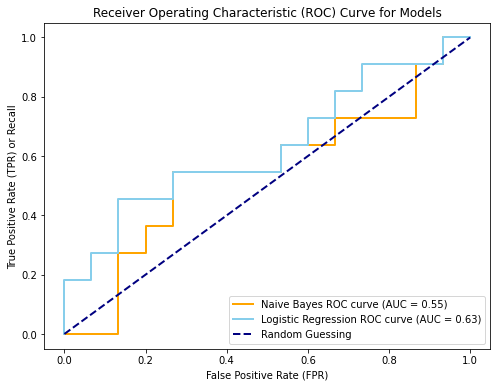

In [44]:
# Fit and evaluate Naive Bayes model on the test set
bayes_model.fit(X_train, y_train)
predictions_bayes = bayes_model.predict(X_test)

# Fit and evaluate Logistic Regression model on the test set
logistic_model.fit(X_train, y_train)
predictions_logistic = logistic_model.predict(X_test)

# ROC curve plotting for Naive Bayes
y_prob_nb = bayes_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='orange', lw=2, label='Naive Bayes ROC curve (AUC = {:.2f})'.format(roc_auc_nb))

# ROC curve plotting for Logistic Regression
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

plt.plot(fpr_logistic, tpr_logistic, color='skyblue', lw=2, label='Logistic Regression ROC curve (AUC = {:.2f})'.format(roc_auc_logistic))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve for Models')
plt.legend(loc='lower right')
plt.show()

# Model Evaluation

Let's assess the performance of the constructed models. While the accuracy of both models is provided, it's essential to delve deeper into the evaluation metrics for binary classification. When a binary model makes predictions, there are four possible outcomes, often represented in a confusion matrix:

Now, let's explore the validation metrics:
  
To interpret these metrics, higher values for accuracy, precision, recall, and F1 score generally indicate better model performance. However, the significance of improvement varies. For instance, improved precision implies fewer false positives, indicating better model performance.

To efficiently obtain and compare these metrics, we can leverage specialized functions in the sklearn.metrics library. We'll define a function to calculate these values and visualize the comparison between the two models. While we already have values for cross-validation, we'll focus on calculating and visualizing the metrics for the initial split.

In [34]:
def compare_graph(metric_values_model1, metric_values_model2, title):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    models = ['Naive Bayes', 'Logistic Regression']

    # Arrange metrics for each model
    bar_width = 0.35
    r1 = np.arange(len(metrics))
    r2 = [x + bar_width for x in r1]

    plt.figure(figsize=(12, 6))

    plt.bar(r1, metric_values_model1, color='skyblue', width=bar_width, edgecolor='grey', label='Naive Bayes')
    plt.bar(r2, metric_values_model2, color='orange', width=bar_width, edgecolor='grey', label='Logistic Regression')

    plt.xlabel('Metrics', fontweight='bold')
    plt.xticks([r + bar_width / 2 for r in range(len(metrics))], metrics)
    plt.title(title)
    plt.legend()
    plt.show()

In [35]:
# Initial Split Validation for Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)
predictions_bayes_initial = bayes_model.predict(X_test)

# Initial Split Validation - Calculate metrics for Naive Bayes 
initial_metrics_bayes = [
    accuracy_score(y_test, predictions_bayes_initial),
    precision_score(y_test, predictions_bayes_initial),
    recall_score(y_test, predictions_bayes_initial),
    f1_score(y_test, predictions_bayes_initial)
]

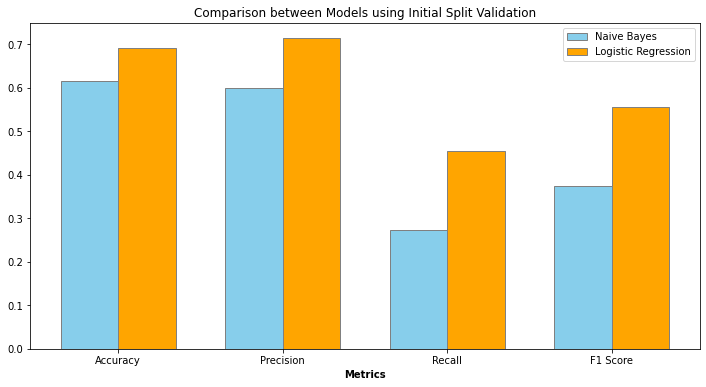

In [36]:
# Initial Split Validation for Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
predictions_logistic_initial = logistic_model.predict(X_test)

# Initial Split Validation - Calculate metrics for Logistic Regression 
initial_metrics_logistic = [
    accuracy_score(y_test, predictions_logistic_initial),
    precision_score(y_test, predictions_logistic_initial),
    recall_score(y_test, predictions_logistic_initial),
    f1_score(y_test, predictions_logistic_initial)
]
# Visualize the comparison for Initial Split Validation
compare_graph(initial_metrics_bayes, initial_metrics_logistic, 'Comparison between Models using Initial Split Validation')

In [39]:
# K-Fold Cross-Validation for Naive Bayes
bayes_model = GaussianNB()
val_bayes = cross_validate(bayes_model, X, y, cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=57),
                           return_train_score=True, scoring=['accuracy', 'precision', 'recall', 'f1'])

# Get the test scores for Naive Bayes - K-Fold Cross-Validation
test_metrics_bayes = [
    np.mean(val_bayes['test_accuracy']),
    np.mean(val_bayes['test_precision']),
    np.mean(val_bayes['test_recall']),
    np.mean(val_bayes['test_f1'])
]

# K-Fold Cross-Validation for Logistic Regression
logistic_model = LogisticRegression()
val_logistic = cross_validate(logistic_model, X, y, cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=57),
                              return_train_score=True, scoring=['accuracy', 'precision', 'recall', 'f1'])

# Get the test scores for Logistic Regression - K-Fold Cross-Validation
test_metrics_logistic = [
    np.mean(val_logistic['test_accuracy']),
    np.mean(val_logistic['test_precision']),
    np.mean(val_logistic['test_recall']),
    np.mean(val_logistic['test_f1'])
]

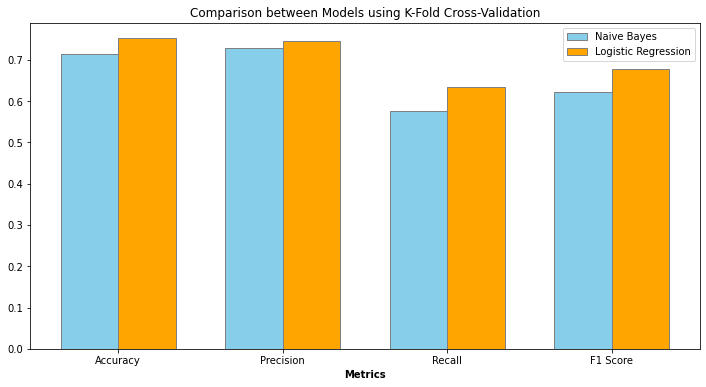

In [38]:
# Visualize the comparison for K-Fold Cross-Validation
compare_graph(test_metrics_bayes, test_metrics_logistic, 'Comparison between Models using K-Fold Cross-Validation')

# Conclusion

Due to the limited size and unbiased nature of our dataset, logistic regression exhibited superior performance compared to Naive Bayes across various evaluation metrics such as accuracy, precision, recall, and F1 score. 

The decision not to perform feature scaling was influenced by the specific characteristics of our data, where such preprocessing steps were deemed unnecessary.

Both logistic regression and Naive Bayes algorithms exhibit commendable performance. However, based on our dataset, logistic regression emerges as the more favorable choice, delivering superior results across various metrics due to unbiased data. This underscores the significance of considering dataset-specific characteristics when selecting the most suitable algorithm for a given task.

Leveraging both initial split and k-fold validation techniques, we have determined that our models exhibit no signs of overfitting or underfitting. This comprehensive assessment ensures the robustness and generalization capability of our models, enhancing our confidence in their performance across various scenarios.